# Homework 5

In [40]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup

## REST API

### Data

In [41]:
URI = "https://api.nobelprize.org/2.1/nobelPrizes?_ga=2.50983722.261356992.1733318967-1265618708.1733318967"
response = requests.get(URI)
data = response.json()

### Task

We start by extracting all the prize motivations (in english) and add them to a list `english_motivations`, then we generate a word cloud with these motivations without stop words.  

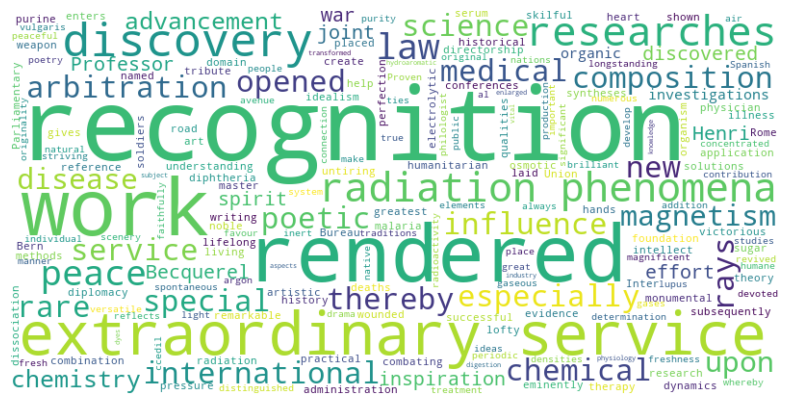

In [43]:
english_motivations = []

# Extract all the prize motivations
for prize in data.get("nobelPrizes", []):
    for laureate in prize.get("laureates", []):
        motivation = laureate.get("motivation", {})
        if isinstance(motivation, dict) and "en" in motivation:
            english_motivations.append(motivation["en"])

# Combine all motivations into a single string
text = " ".join(english_motivations)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(STOPWORDS)).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes

plt.show()

## Web Scraping

### Task

For this task we define a function `extract_books(page)` that extracts `upc`, `title`, `price` and `rating` from each book on the specified page. We then use a for-loop to apply this function to the first three pages and finally we convert this data into a dataframe `books_df`. 

In [44]:
# Base URL of the website
BASE_URL = "https://books.toscrape.com/catalogue/page-{}.html"

# Function to extract book data from a page
def extract_books(page):
    url = BASE_URL.format(page)
    response = requests.get(url)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, 'html.parser')
    
    books = []
    
    # Find all book containers on the page
    for book in soup.select(".product_pod"):
        title = book.h3.a["title"]
        price = book.select_one(".price_color").text
        rating = book.p["class"][1]
        
        # Navigate to the book detail page for upc
        book_url = "https://books.toscrape.com/catalogue/" + book.h3.a["href"]
        book_response = requests.get(book_url)
        book_soup = BeautifulSoup(book_response.text, 'html.parser')
        upc = book_soup.select_one("table.table.table-striped tr:nth-child(1) td").text
        
        # Append the extracted data
        books.append({
            "upc": upc,
            "title": title,
            "price": price,
            "rating": rating
        })
    
    return books

# Scrape the first three pages
all_books = []
for page in range(1, 4):
    all_books.extend(extract_books(page))

# Convert to DataFrame
books_df = pd.DataFrame(all_books)

# Display the DataFrame
books_df

,upc,title,price,rating
0,a897fe39b1053632,A Light in the Attic,£51.77,Three
1,90fa61229261140a,Tipping the Velvet,£53.74,One
2,6957f44c3847a760,Soumission,£50.10,One
3,e00eb4fd7b871a48,Sharp Objects,£47.82,Four
4,4165285e1663650f,Sapiens: A Brief History of Humankind,£54.23,Five
5,f77dbf2323deb740,The Requiem Red,£22.65,One
6,2597b5a345f45e1b,The Dirty Little Secrets of Getting Your Dream...,£33.34,Four
7,e72a5dfc7e9267b2,The Coming Woman: A Novel Based on the Life of...,£17.93,Three
8,e10e1e165dc8be4a,The Boys in the Boat: Nine Americans and Their...,£22.60,Four
9,1dfe412b8ac00530,The Black Maria,£52.15,One
